In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:>

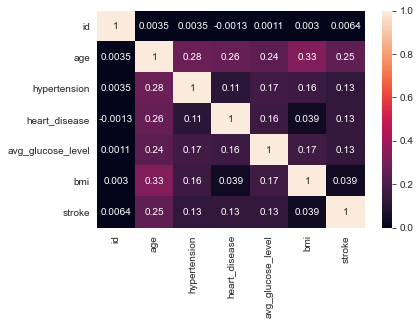

In [27]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

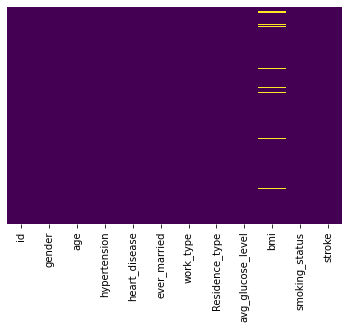

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
#Gender Column

In [10]:
#Replacing Other with Male
df['gender'].replace('Other','Male',inplace=True)

In [11]:
#Replace Bmi Missing Values
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

<AxesSubplot:xlabel='gender', ylabel='age'>

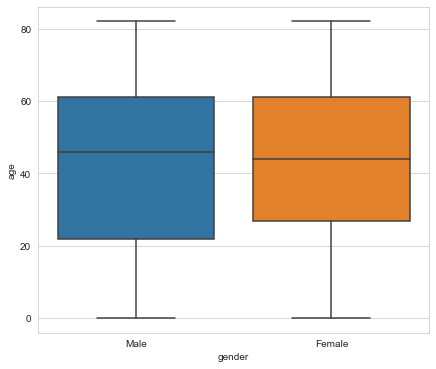

In [236]:
plt.figure(figsize=(7,6))
sns.set_style('whitegrid')
sns.boxplot(x='gender',y='age',data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

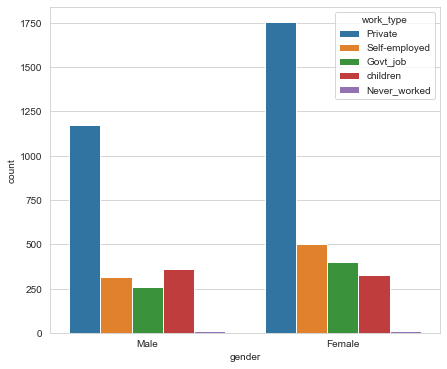

In [237]:
plt.figure(figsize=(7,6))
sns.countplot(x='gender',hue='work_type',data=df)

Text(0.5, 1.0, ' Bmi vs Age')

<Figure size 864x360 with 0 Axes>

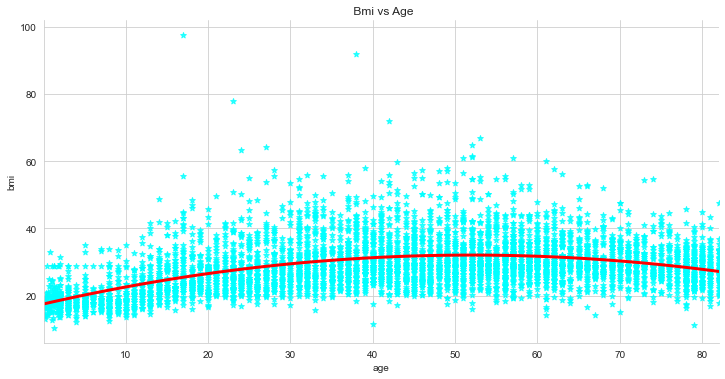

In [13]:
plt.figure(figsize=(12,5))
sns.lmplot(x="age", y="bmi",data=df,markers="*",
           order=2, ci=None, scatter_kws={"color": "cyan"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title(" Bmi vs Age")

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

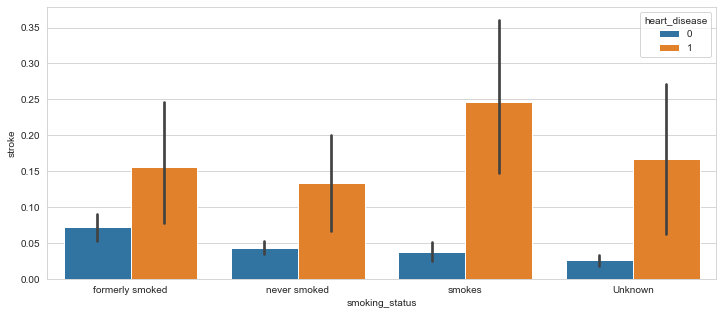

In [15]:
plt.figure(figsize=(12,5))
sns.barplot(x='smoking_status',y='stroke',data=df,hue='heart_disease')

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

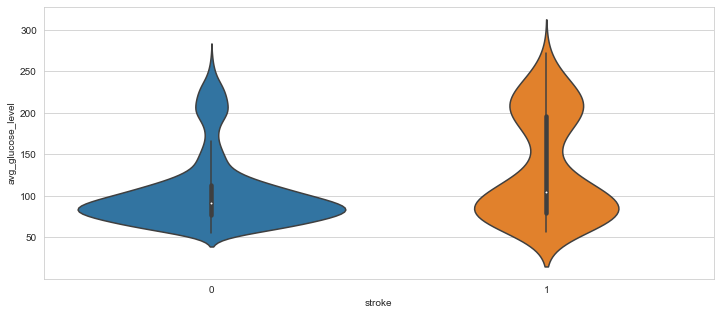

In [16]:
plt.figure(figsize=(12,5))
sns.violinplot(x='stroke',y='avg_glucose_level',data=df)

(0.0, 3000.0)

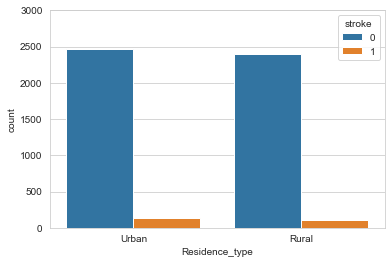

In [78]:
b =sns.countplot(x='Residence_type',hue='stroke',data=df)
b.set_ylim([0,3000])

In [72]:
#Among Urban And Rural Who is More prone to Stroke 

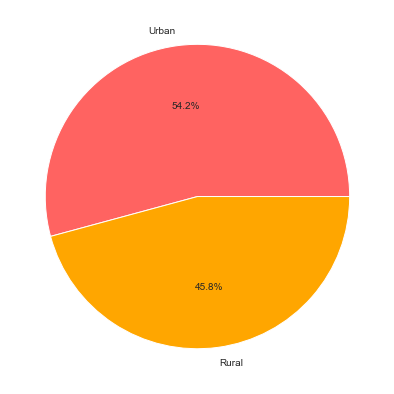

In [90]:
plt.figure(figsize=(8,7))
label = ['Urban','Rural']
plt.pie(df[df['stroke']==1]['Residence_type'].value_counts(),labels= label ,autopct= "%1.1f%%",colors=['#ff6361','#ffa600'])
plt.show()

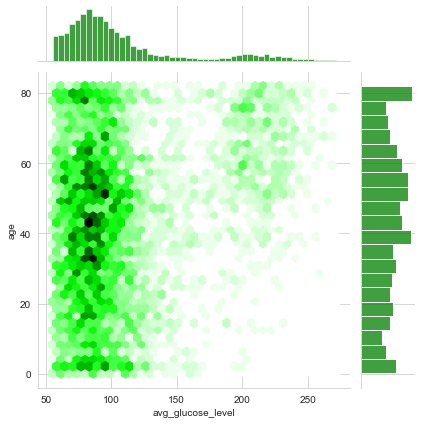

In [4]:
sns.set_style('whitegrid')
sns.jointplot(x='avg_glucose_level',y='age',data=df,color='green',kind='hex')

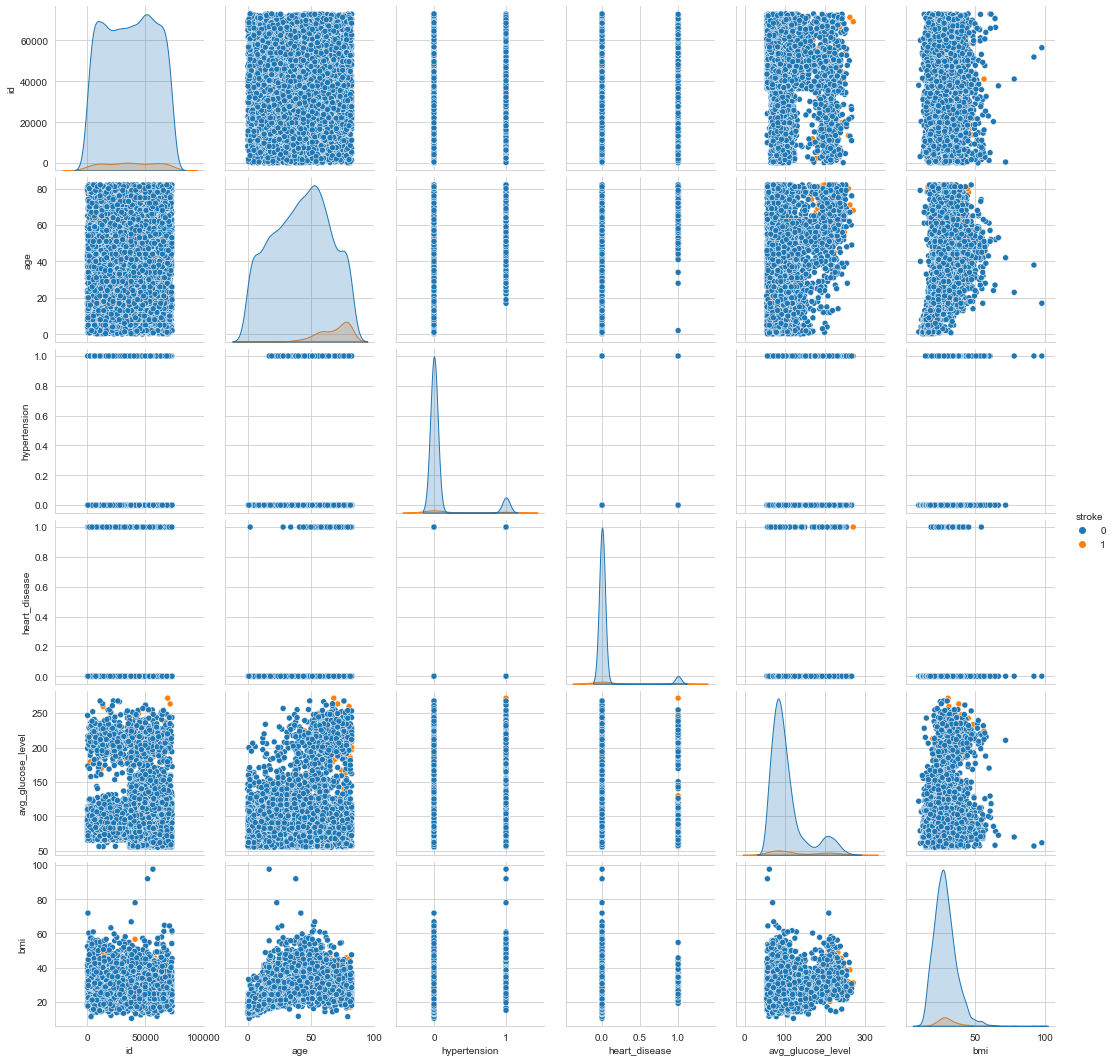

In [218]:
sns.pairplot(df,hue='stroke')

In [92]:
#Model Building To Prdict Whether Has Stroke Or Not 

In [12]:
#Fix married,Male,Residance columns 
df['Male']=df['gender'].apply(lambda x : 1 if x=='Male' else 0) 
df["Residence"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["Married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

In [13]:
df = pd.get_dummies(df, columns=['smoking_status'],drop_first=True)

In [14]:
df['work_type'] = df['work_type'].map({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})

In [15]:
df.drop(['id','gender','Residence_type','ever_married'],axis=1,inplace=True)

In [246]:
df.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,Male,Residence,Married,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,0,228.69,36.600000,1,1,1,1,1,0,0
1,61.0,0,0,1,202.21,28.893237,1,0,0,1,0,1,0
2,80.0,0,1,0,105.92,32.500000,1,1,0,1,0,1,0
3,49.0,0,0,0,171.23,34.400000,1,0,1,1,0,0,1
4,79.0,1,0,1,174.12,24.000000,1,0,0,1,0,1,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
from sklearn.metrics import confusion_matrix

In [17]:
X = df.drop('stroke',axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=24)

In [18]:
logmodel.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
predictions = logmodel.predict(X_test)

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuaracy-score:{}".format(accuracy_score(y_test,predictions)))
print((confusion_matrix(y_test,predictions)))

Accuaracy-score:0.949119373776908
[[970   2]
 [ 50   0]]


In [23]:
print('X train Shape: ',X_train.shape)
print('Y train Shape: ',y_train.shape)
print('X test Shape: ',X_test.shape)
print('Y test Shape: ',y_test.shape)

X train Shape:  (4088, 12)
Y train Shape:  (4088,)
X test Shape:  (1022, 12)
Y test Shape:  (1022,)


In [24]:
model = LogisticRegression(penalty='l1',solver='saga')
model.fit(X_train,y_train)
print('LogisticRegression score is: ',np.round(model.score(X_test,y_test)*100,decimals=2))

LogisticRegression score is:  95.01


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


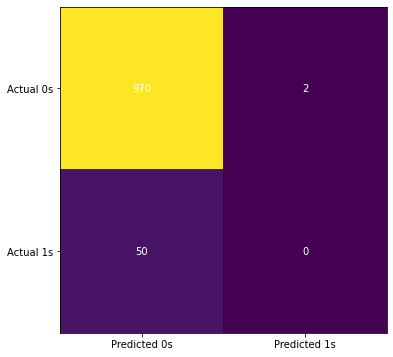

In [31]:
cm = confusion_matrix(y_test, predictions)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()